# **Introduction to Hypothesis Testing**

`Defination:`

>Hypothesis Testing is a **statistical tool**, that allows the resemblance of two or more process attributes – `mean`, `median`, and `standard deviation`. It provides a method to determine differences.

- An important part of a conclusion reached based on `random sampling` -(statistical inference)
    - A hypothesis is a statement we want to verify using data
        - **is there a difference?**
        - **has there been a change?**


- `Null` and `Alternative` hypotheses are formed
    - Level of risk and confidence required
- Experimentation is conducted, and interpret the results
    - Fail to reject the null hypothesis
        - No change. No difference
    - Reject the null hypothesis
        - There is a change, a difference

<p align='center'>
  <a href="#"><img src='https://github.com/mohd-faizy/Stats-with-Data/blob/main/_jpg/HT1.png?raw=true' width=75%></a>
</p>

## **What might we “Test” for?**

We will be testing for a Change or Difference in Process:

- Central Tendency
    - `Mean`, `Median`, `Mode`
- Variation
    - `Variance`, `Standard Deviation`
- Proportion
    - `%age` (ratio, proportion)
- Frequency (of occurrence)
    - Distribution of `count`/`frequency`

## Testing Protocol

- `“Null”` hypothesis ($H_0$)
    - This statement validates the status quo – no significant change will be observed. Any differences detected are purely due to chance and not a change in the process.
    - Symbols:
        - $=$ (equals)
        - $<$ (not less than)
        - $>$ (not greater than)
- `“Alternative”` hypothesis ($H_1$)
    - This is a statement that there will be a difference in statistical significance detected; there has been a change.
    - Symbols:
        - $\neq$ (doesn’t equal)
        - $<$ (is less than)
        - $>$ (is greater than)

The hypotheses are complementary to each other. If one is true, the other is not true, and vice versa.

## **If the `p-value` is low, the null must go!**

When performing any statistical test, the outcome is based on sampling from the population; therefore, there is room for error. Most statistical tests are run with a `95% confidence level`, indicating a `5% chance` of making an error.
$\alpha$ ~ `Signifiance Level`

The decision to accept or reject the null hypothesis is predicated on the calculated `p-value`. If the `p-value` is a smaller amount than or adequate to a preassigned `significance level` (normally set at `5%`), then we reject the null hypothesis and accept the alternative.

>A `p-value` will be calculated by the statistical API of `sklearn` `scipy` or `stats` when running a hypothesis test.

## **Types of Hypothesis Testing**

There are many different types of hypothesis tests, and they can be divided into two main categories:

- **Parametric tests**

    - Makes inferences about parameters like `mean` and `variance`
    - Based on assumptions of specific distributions (ex. `“normal”` or `“t”` distributions)

- **Non-parametric tests**

    - Makes inferences about frequency distribution like `median`, `distribution type`
    - Usually include sign and rank tests
    - **Do not** require normality assumptions (but have some assumptions… always check them!)
    - Depending on the type of data you have collected, and whether it’s normal or non-normal, several hypothesis tests are available for comparing process characteristics.

<p align='center'>
  <a href="#"><img src='https://github.com/mohd-faizy/Stats-with-Data/blob/main/_jpg/HT2.png?raw=true' width=100%></a>
</p>


## `scipy.stats | shapiro`

**Process of Hypothesis testing**

`Purpose` $\Rightarrow$ `Assumptions` $\Rightarrow$ `How to...` $\Rightarrow$ `Interpret`

### Normality test using `Shapiro-Wilk` Test: tests If data is normally distributed 

>`Assumption` : Observations are identically distributed


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
wine_url = 'https://raw.githubusercontent.com/mohd-faizy/Stats-with-Data/main/_dataset/winequality-red.csv'

df_wine = pd.read_csv(wine_url)
df_wine.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

Ploting the `histogram` for volatile acidity

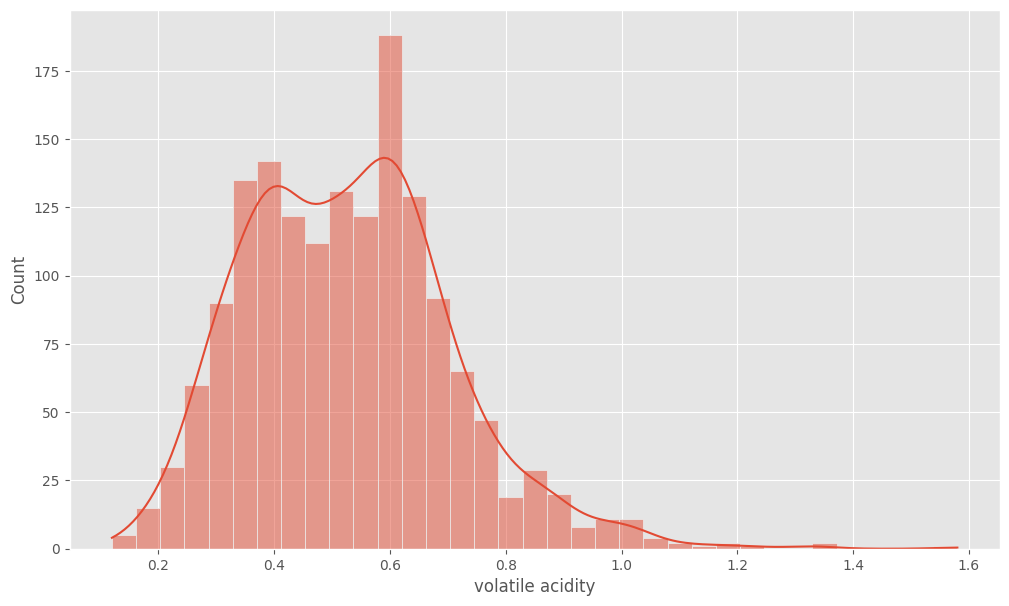

In [3]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 7))
sns.histplot(x=df_wine['volatile acidity'], kde=True)
plt.show()

### `scipy.stats` for testing normality using `Shapiro-Wilk test`

In [4]:
# Importing the shapiro function from scipy.stats for testing normality
from scipy.stats import shapiro

# Extracting data to test for normality from WineData's 'volatile acidity' column
DataToTest = df_wine['volatile acidity']

# setting  random seed
np.random.seed(42)

alpha = 0.05

# Performing the Shapiro-Wilk test for normality
statistic, p_value  = shapiro(DataToTest)

# Printing the test statistics and p-value
print(statistic, p_value )

# Checking if p-value is greater than 0.05, which indicates a normal distribution
# Checking if p-value is greater than 0.05, which indicates a normal distribution
if p_value > alpha:
    print('Normally distributed (fail to reject H0)')
else:
    print('Not normally distributed (reject H0)')

0.9743980765342712 2.9456052490757045e-16
Not normally distributed (reject H0)




fixed acidity : stat = 0.9435973763465881, p-value = 3.254617438951396e-24
-----------------------------------
fixed acidity Not normally distributed (reject H0)


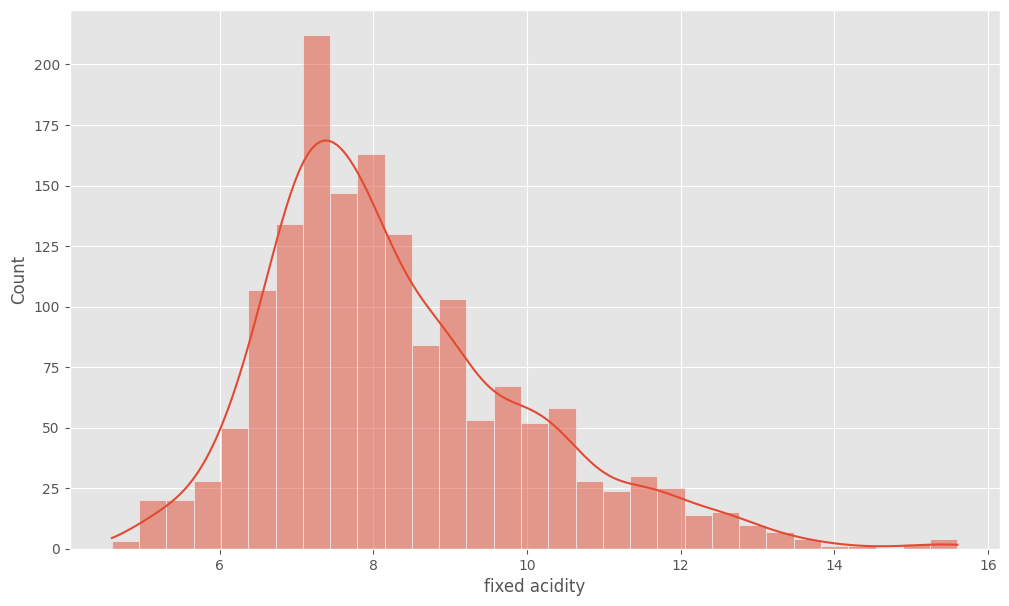



volatile acidity : stat = 0.9743980765342712, p-value = 2.9456052490757045e-16
-----------------------------------
volatile acidity Not normally distributed (reject H0)


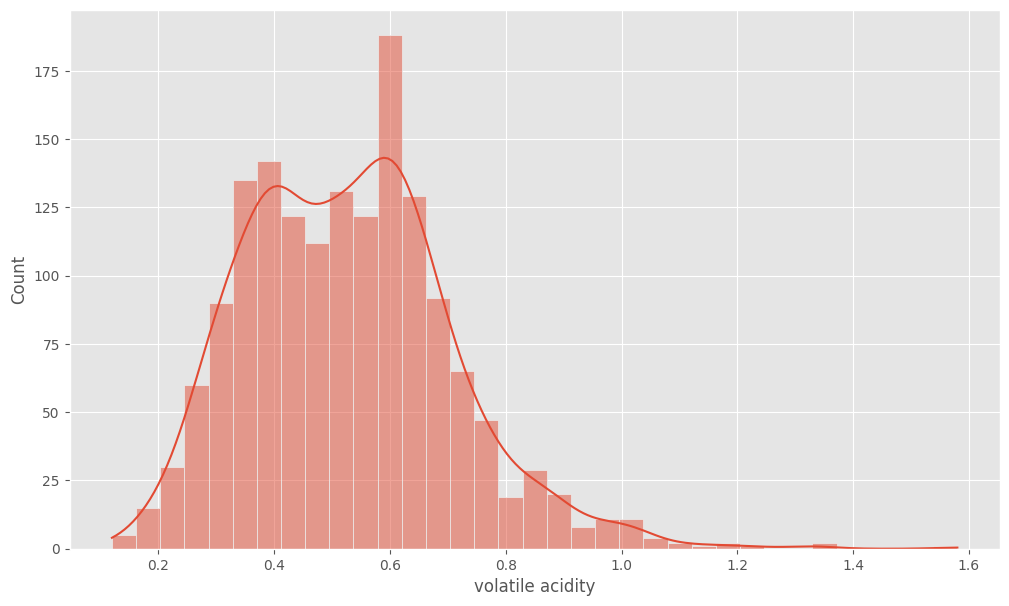



citric acid : stat = 0.9544928073883057, p-value = 6.973704077770638e-22
-----------------------------------
citric acid Not normally distributed (reject H0)


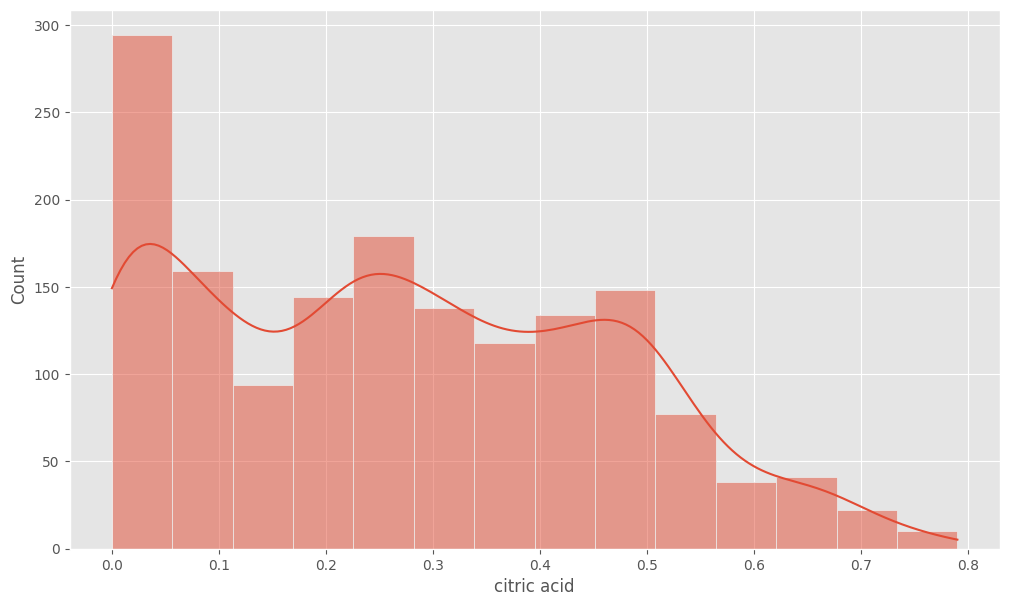



residual sugar : stat = 0.5648766756057739, p-value = 0.0
-----------------------------------
residual sugar Not normally distributed (reject H0)


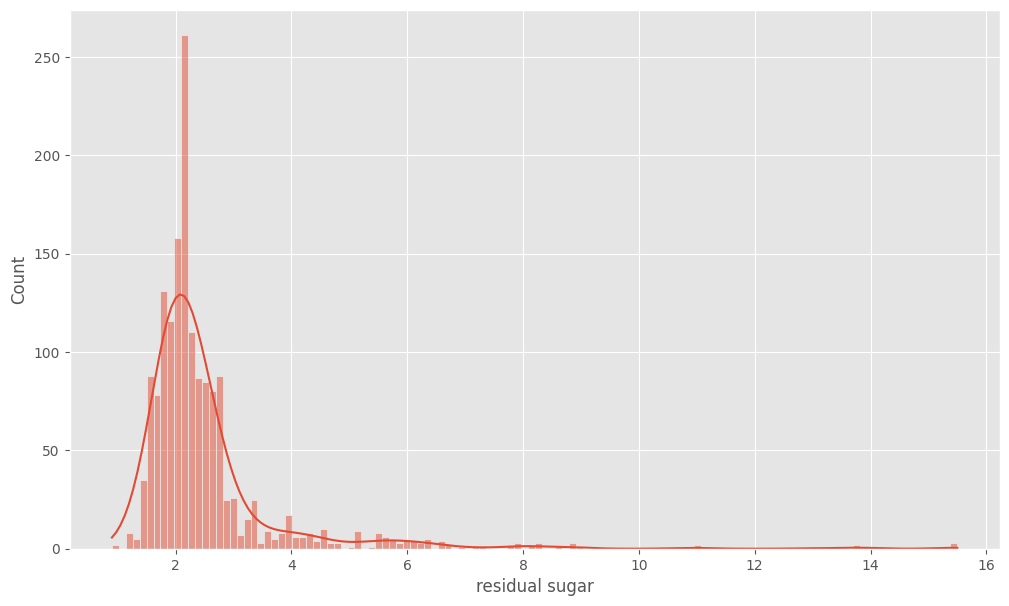



chlorides : stat = 0.4996381998062134, p-value = 0.0
-----------------------------------
chlorides Not normally distributed (reject H0)


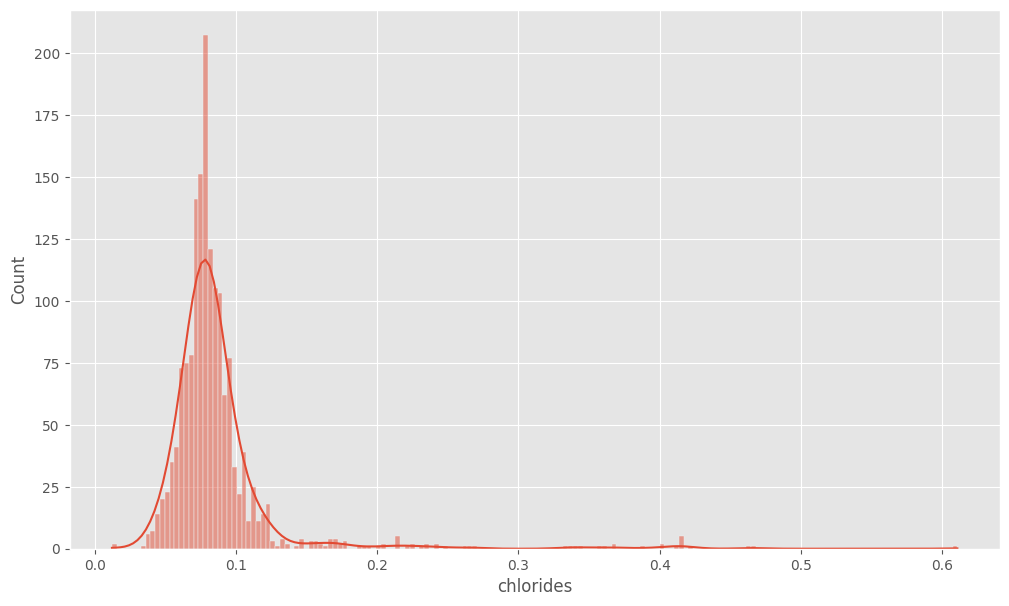



free sulfur dioxide : stat = 0.9012932181358337, p-value = 6.944126142595609e-31
-----------------------------------
free sulfur dioxide Not normally distributed (reject H0)


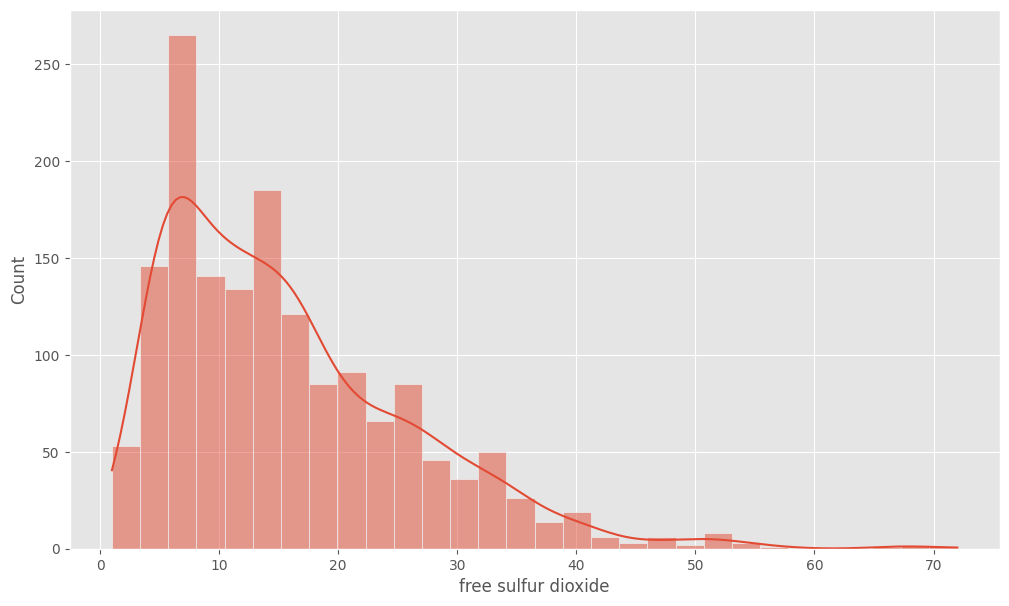



total sulfur dioxide : stat = 0.8728437423706055, p-value = 3.470872067768391e-34
-----------------------------------
total sulfur dioxide Not normally distributed (reject H0)


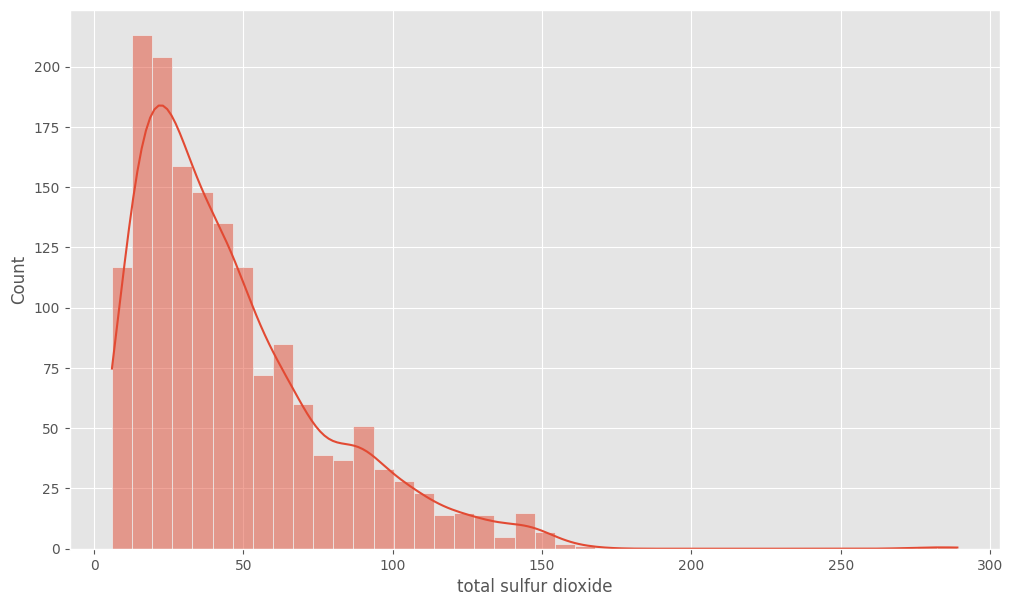



density : stat = 0.9908312559127808, p-value = 1.8848286487127552e-08
-----------------------------------
density Not normally distributed (reject H0)


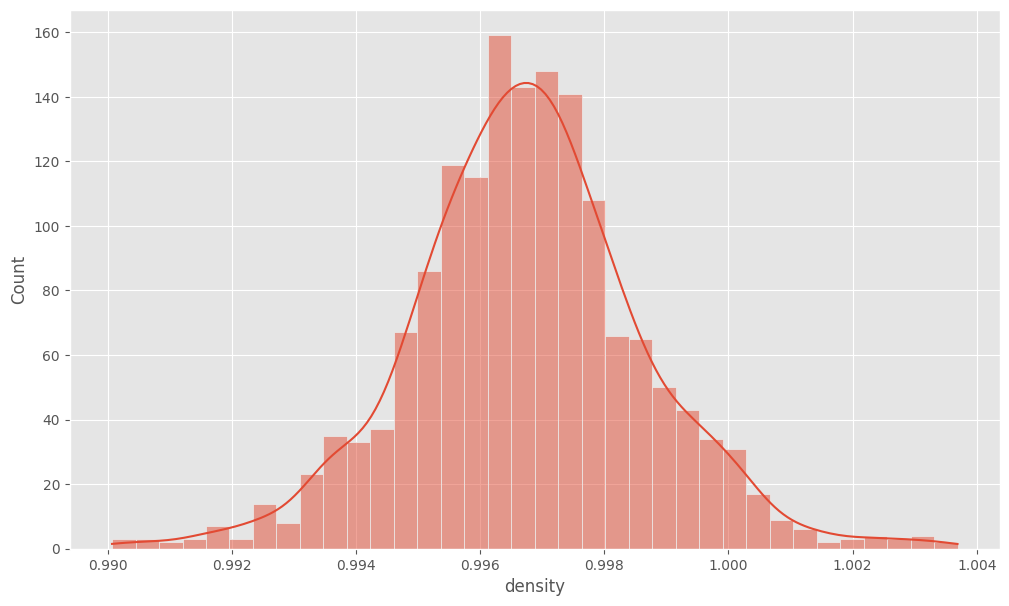



pH : stat = 0.9930684566497803, p-value = 8.103340292109351e-07
-----------------------------------
pH Not normally distributed (reject H0)


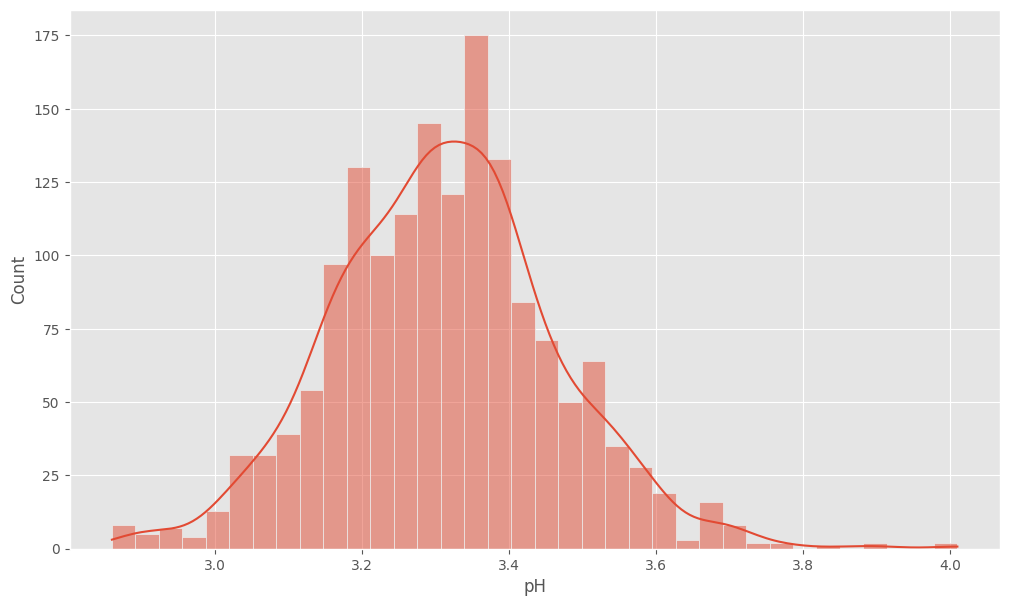



sulphates : stat = 0.8591722846031189, p-value = 1.4438544592725792e-35
-----------------------------------
sulphates Not normally distributed (reject H0)


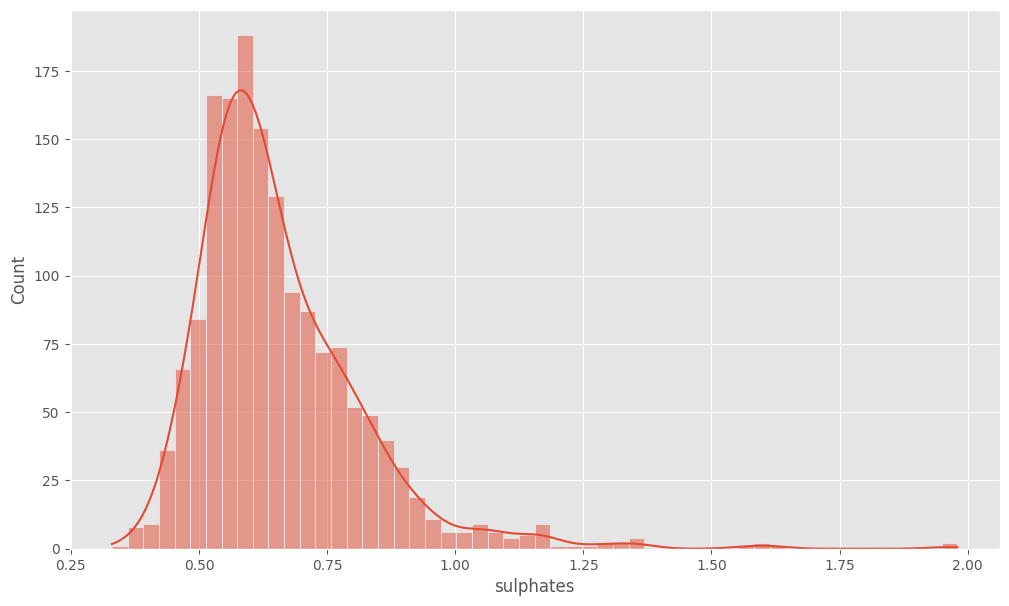



alcohol : stat = 0.9296740293502808, p-value = 9.663310355132202e-27
-----------------------------------
alcohol Not normally distributed (reject H0)


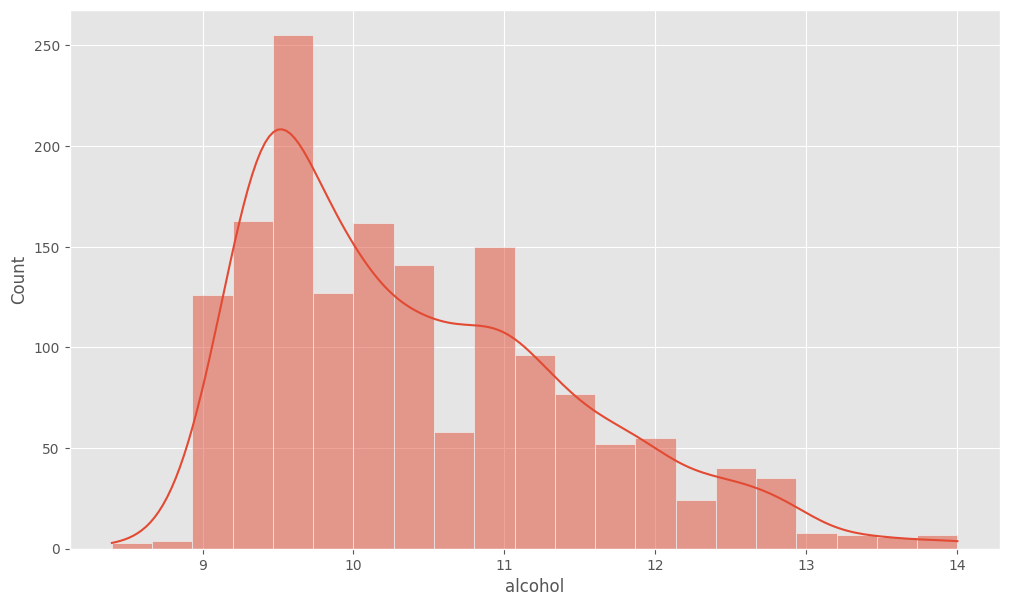



quality : stat = 0.8571439385414124, p-value = 9.201618249668206e-36
-----------------------------------
quality Not normally distributed (reject H0)


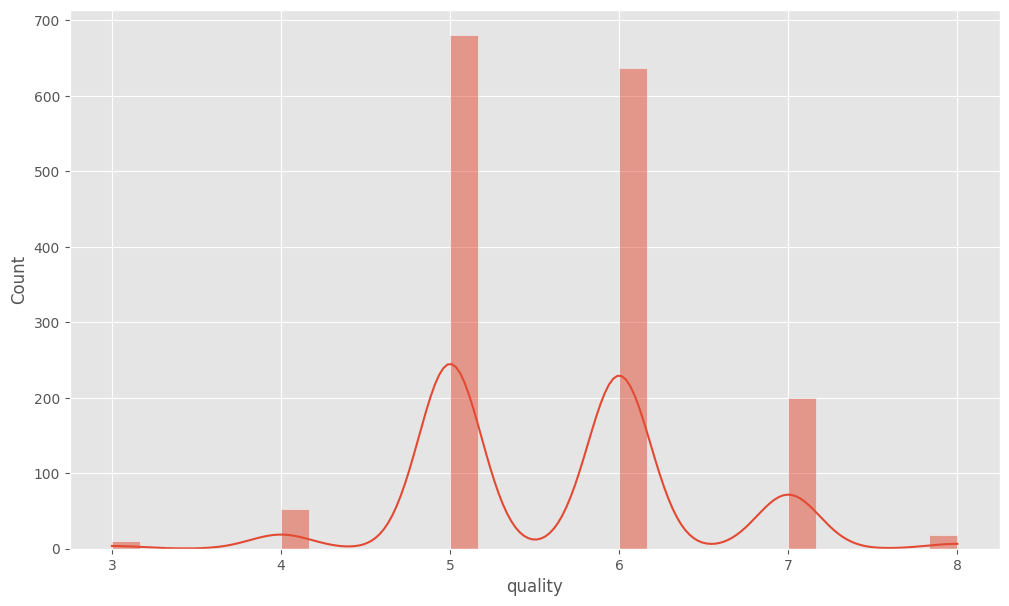

In [5]:
# Importing the shapiro function from scipy.stats for testing normality
from scipy.stats import shapiro

name_list = []

# setting  random seed
np.random.seed(42)

alpha = 0.05

for i, j in enumerate(df_wine.columns):
    name_list.append(str(j))
    # Performing the Shapiro-Wilk test for normality
    statistic, p_value  = shapiro(df_wine[j])
    print("\n")
    print(f"{name_list[i]} : stat = {statistic}, p-value = {p_value}")
    print("-"*35)

    # Checking if p-value is greater than 0.05, which indicates a normal distribution
    if p_value > alpha:
        print(f'{name_list[i]} ⭐⭐⭐Normally distributed⭐⭐⭐ (fail to reject H0)')
    else:
        print(f'{name_list[i]} Not normally distributed (reject H0)')

    plt.style.use('ggplot')
    plt.figure(figsize=(12, 7))
    sns.histplot(x=df_wine[j], kde=True)
    plt.show()

**Iris Dataset**

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


sepal_length : stat = 0.9760899543762207, p-value = 0.01018026564270258
---------------------------------------------------------------------------
sepal_length Not normally distributed (reject H0)


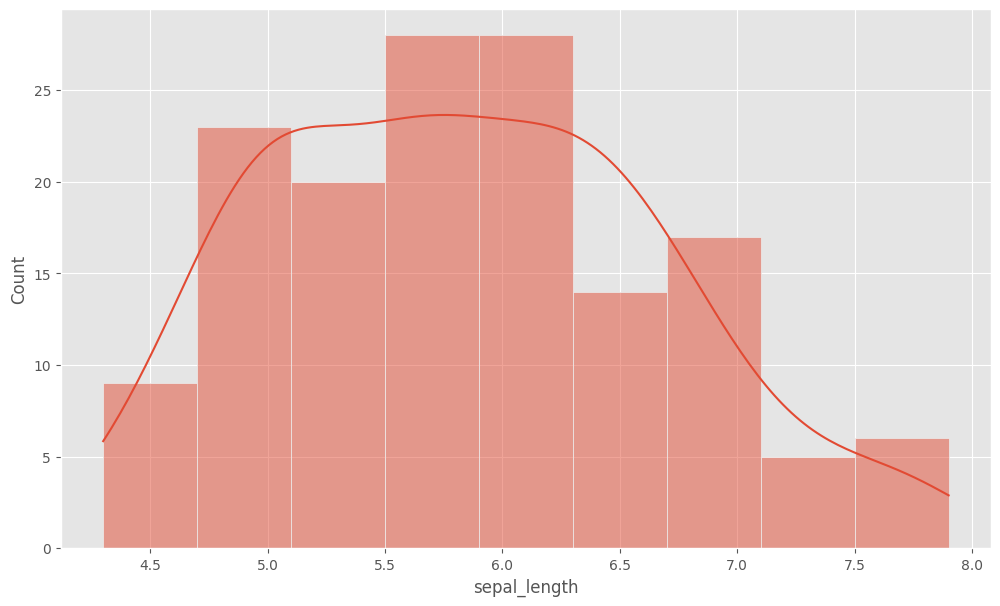



sepal_width : stat = 0.9849168062210083, p-value = 0.10112646222114563
---------------------------------------------------------------------------
sepal_width ⭐⭐⭐Normally distributed⭐⭐⭐ (fail to reject H0)


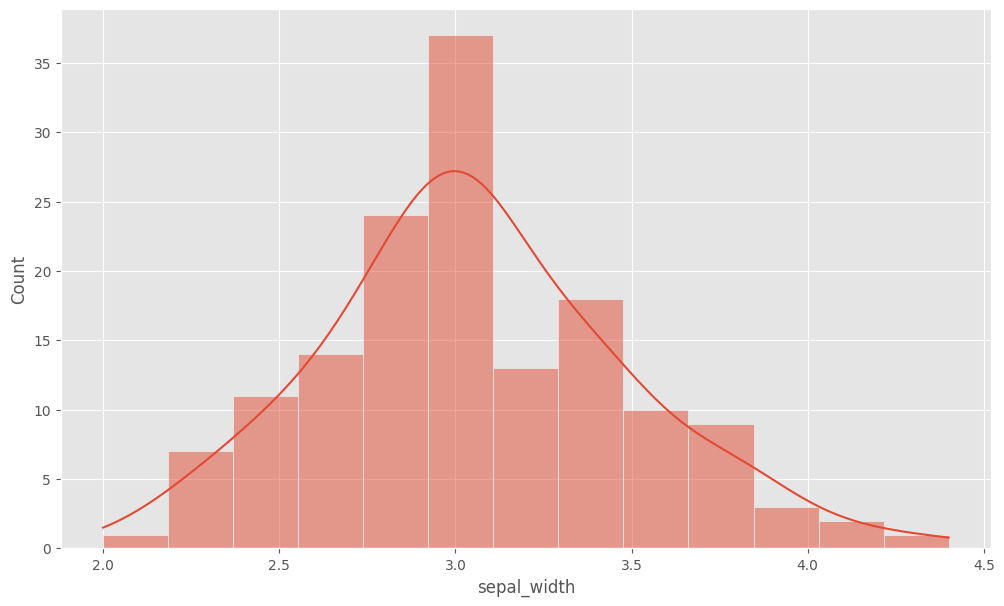



petal_length : stat = 0.8762685656547546, p-value = 7.412652158755861e-10
---------------------------------------------------------------------------
petal_length Not normally distributed (reject H0)


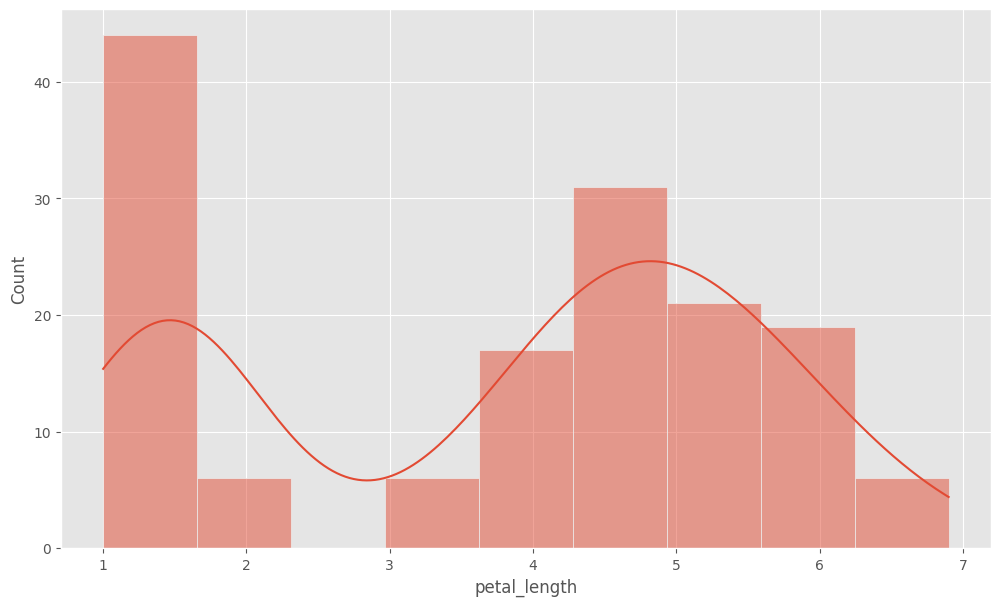



petal_width : stat = 0.9018340706825256, p-value = 1.680264105630158e-08
---------------------------------------------------------------------------
petal_width Not normally distributed (reject H0)


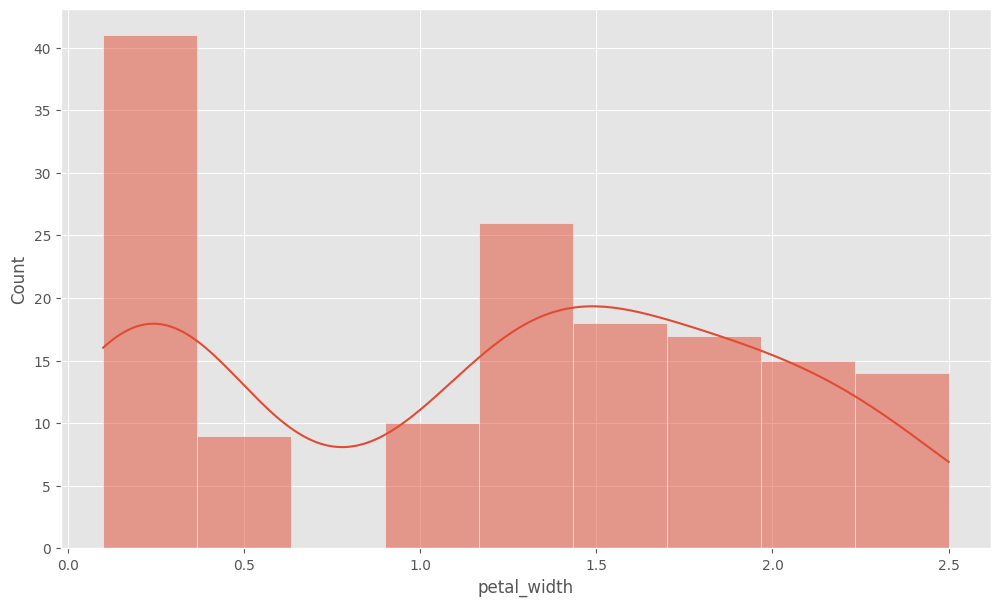

In [6]:
# Importing the shapiro function from scipy.stats for testing normality
from scipy.stats import shapiro

df_iris = sns.load_dataset('iris')

# Checking the datatype
print(df_iris.dtypes)

# Dropping non-numerical the species object
df_iris = df_iris.drop(columns=['species'])

# setting  random seed
np.random.seed(42)

name_list = []
alpha = 0.05

for i, j in enumerate(df_iris.columns):
    name_list.append(str(j))
    # Performing the Shapiro-Wilk test for normality
    statistic, p_value = shapiro(df_iris[j])
    print("\n")
    print(f"{name_list[i]} : stat = {statistic}, p-value = {p_value}")
    print("-"*75)

    if p_value > alpha:
        print(f'{name_list[i]} ⭐⭐⭐Normally distributed⭐⭐⭐ (fail to reject H0)')
    else:
        print(f'{name_list[i]} Not normally distributed (reject H0)')

    plt.style.use('ggplot')
    plt.figure(figsize=(12, 7))
    sns.histplot(x=df_iris[j], kde=True)
    plt.show()

### **Genrating the Normally distributed data using numpy**

#### **Data - 1**

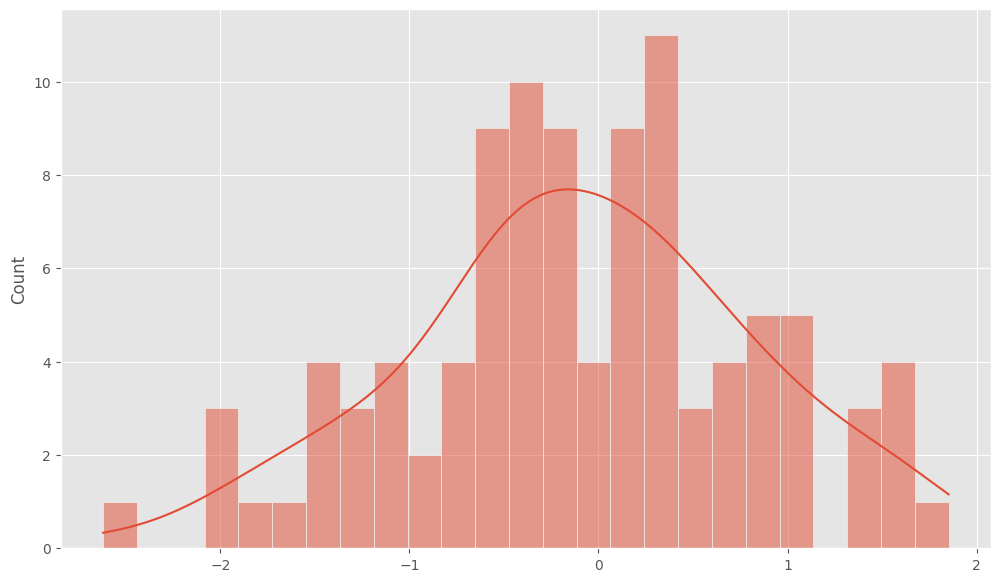

In [7]:
# Genrating the data
norm_data1 = np.random.randn(100)

# setting  random seed
np.random.seed(42)

# plot
plt.style.use('ggplot')
plt.figure(figsize=(12, 7))
sns.histplot(x=norm_data1, kde=True, bins=25)
plt.show()

#### **Data - 2**

100


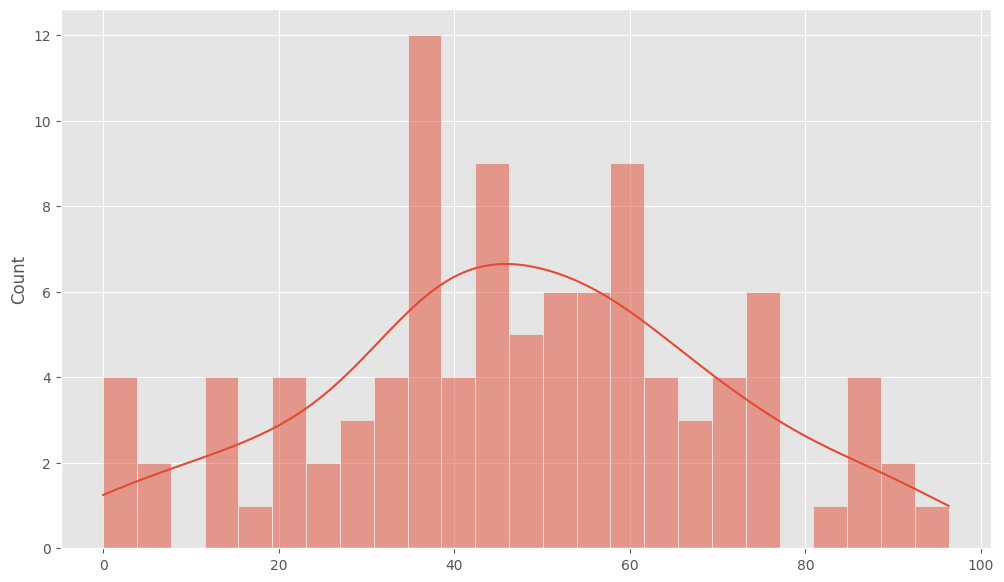

In [8]:
# Genrating the data
mu, sigma = 50, 25 # mean and standard deviation
norm_data2 = np.random.normal(mu, sigma, 100) # 10 random numbers from normal distribution
norm_data2 = np.clip(norm_data2, 0, 100) # clip values between 0 and 100
print(len(norm_data2))

# setting  random seed
np.random.seed(42)

# plot
plt.style.use('ggplot')
plt.figure(figsize=(12, 7))
sns.histplot(x=norm_data2, kde=True, bins=25)
plt.show()

#### **Data - 3**

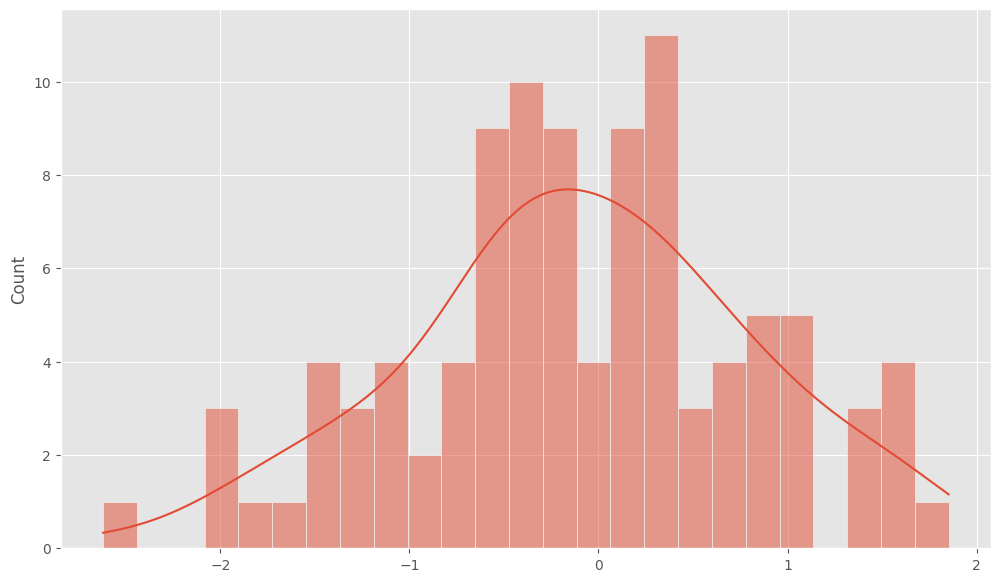

In [9]:
import numpy as np

# Set the mean, standard deviation, and number of values to be generated
mean = 0
std_dev = 1
num_values = 100

# Generate the normally distributed data
norm_data3 = np.random.normal(mean, std_dev, num_values)

# random seed
np.random.seed(42)

# Plot
plt.style.use('ggplot')
plt.figure(figsize=(12, 7))
sns.histplot(x = norm_data3, kde=True, bins=25)
plt.show()

In [10]:
# Importing the shapiro function from scipy.stats for testing normality
from scipy.stats import shapiro

norm_data_list = [norm_data1, norm_data2, norm_data3]
list_name = ["norm_data1", "norm_data2", "orm_data3"]

for i, j in enumerate(norm_data_list):
    # Performing the Shapiro-Wilk test for normality
    stat, p = shapiro(j)
    print("\n")
    print(stat, p)
    print("-"*35)

    # Checking if p-value is greater than 0.05, which indicates a normal distribution
    if p > 0.05:
        print(f'{list_name[i]} has Normal Distribution')
    else:
        print(f'{list_name[i]} Not a Normal Distribution')



0.9898831844329834 0.6551515460014343
-----------------------------------
norm_data1 has Normal Distribution


0.9860655069351196 0.37790703773498535
-----------------------------------
norm_data2 has Normal Distribution


0.9898831844329834 0.6551515460014343
-----------------------------------
orm_data3 has Normal Distribution


## `scipy.stats | normaltest`

Normality test using $K^2$ `Normality Test`: tests If data is normally distributed.

>`Assumption` : Observations are identically distributed

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


sepal_length : stat = 5.735584236235733, p-value = 0.05682424941067306
---------------------------------------------------------------------------
sepal_length ⭐⭐⭐Normally distributed⭐⭐⭐ (fail to reject H0)


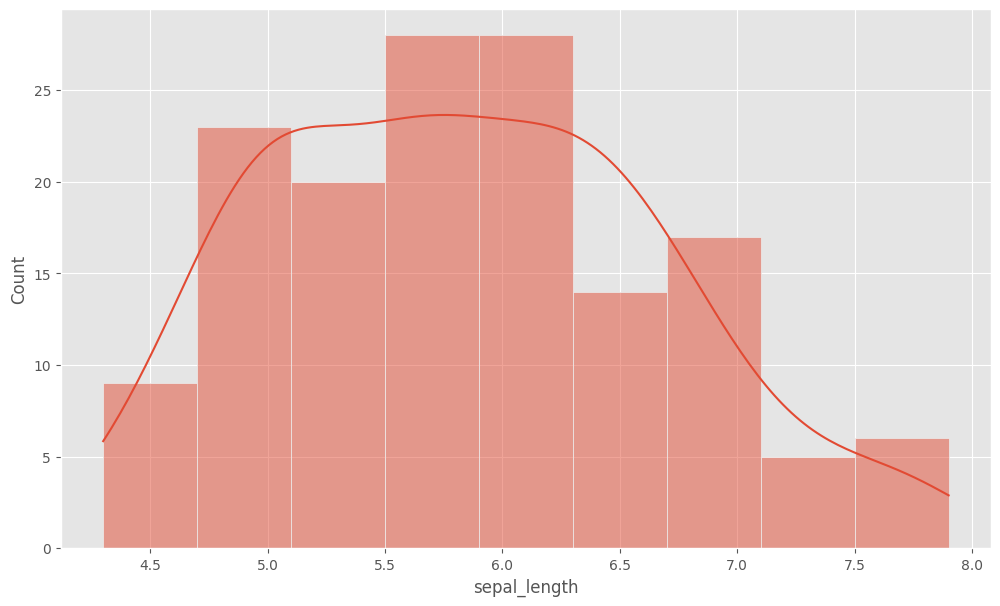



sepal_width : stat = 3.1238322481520377, p-value = 0.2097338099298262
---------------------------------------------------------------------------
sepal_width ⭐⭐⭐Normally distributed⭐⭐⭐ (fail to reject H0)


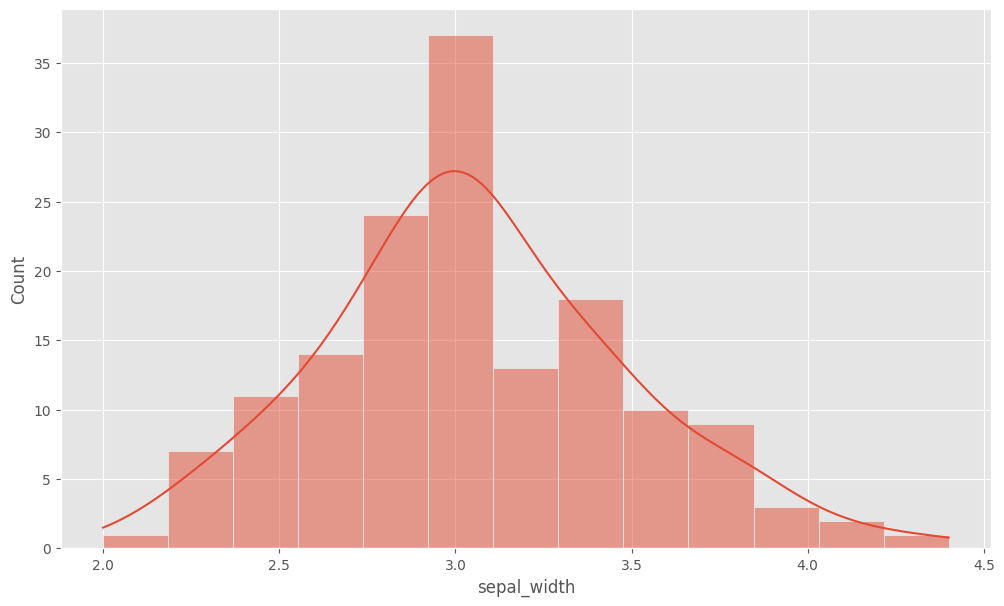



petal_length : stat = 221.68729405585384, p-value = 7.264667501338673e-49
---------------------------------------------------------------------------
petal_length Not normally distributed (reject H0)


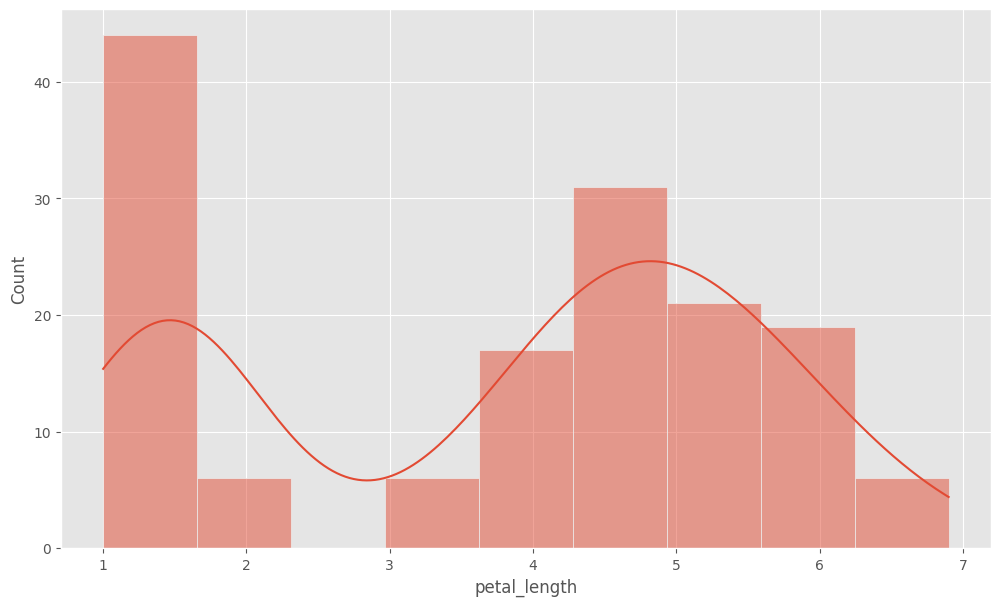



petal_width : stat = 137.55596543193647, p-value = 1.3492785927137586e-30
---------------------------------------------------------------------------
petal_width Not normally distributed (reject H0)


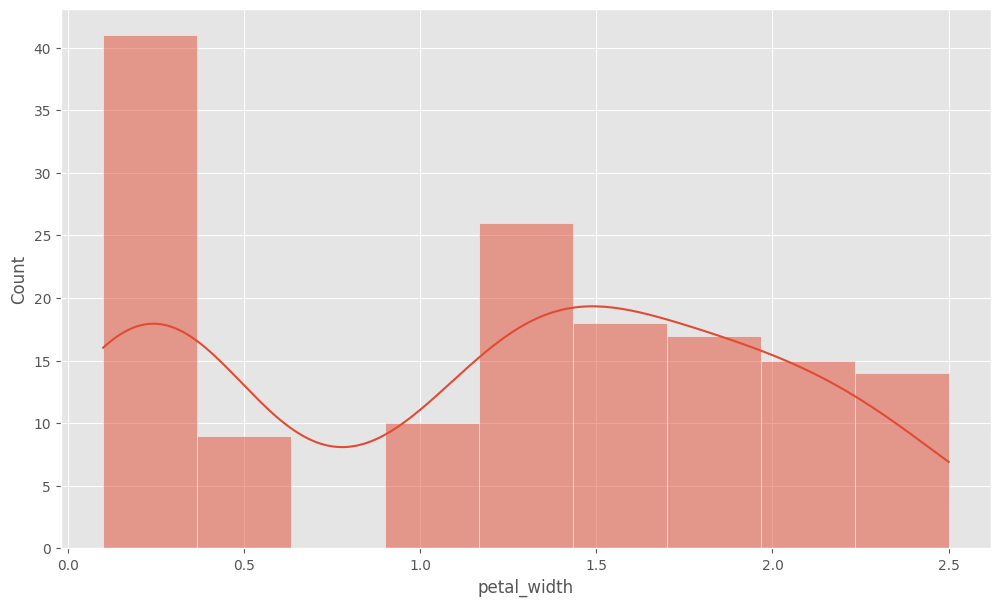

In [11]:
from scipy.stats import normaltest

df_iris = sns.load_dataset('iris')

# Checking the datatype
print(df_iris.dtypes)

# Dropping non-numerical the species object
df_iris = df_iris.drop(columns=['species'])

# setting  random seed
np.random.seed(42)

name_list = []
alpha = 0.05

for i, j in enumerate(df_iris.columns):
    name_list.append(str(j))
    # Performing the Shapiro-Wilk test for normality
    statistic, p_value = normaltest(df_iris[j])
    print("\n")
    print(f"{name_list[i]} : stat = {statistic}, p-value = {p_value}")
    print("-"*75)

    if p_value > alpha:
        print(f'{name_list[i]} ⭐⭐⭐Normally distributed⭐⭐⭐ (fail to reject H0)')
    else:
        print(f'{name_list[i]} Not normally distributed (reject H0)')

    plt.style.use('ggplot')
    plt.figure(figsize=(12, 7))
    sns.histplot(x=df_iris[j], kde=True)
    plt.show()

##  **Correlation Tes**t

- `Pearson` and `Spearman’s` Rank Correlation
>`Asumption` - Identical and Normal Distribution

>The `correlation coefficient` measures the `strength` and `direction` of the relationship between the two datasets. A value close to `1` indicates a `strong positive` relationship, while a value close to `-1` indicates a `strong negative` relationship. A value close to `0` indicates `No relationship`.

### `Spearman`

In [12]:
df_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

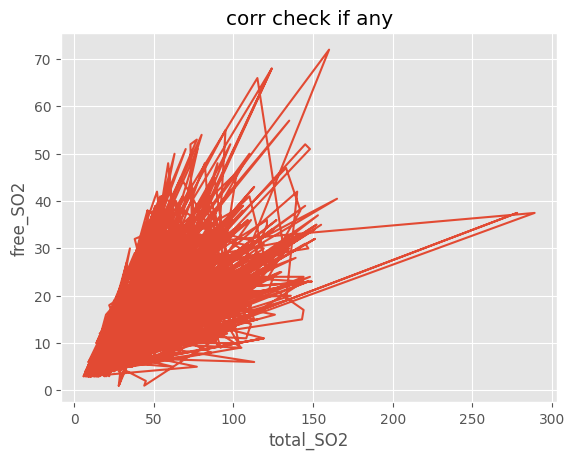

In [13]:
tot_so2 = df_wine['total sulfur dioxide']
free_so2= df_wine['free sulfur dioxide']

plt.plot(tot_so2, free_so2)
plt.xlabel("total_SO2")
plt.ylabel("free_SO2")
plt.title("corr check if any")
plt.show()

In [14]:
from scipy.stats import spearmanr

statistic, p_value = spearmanr(tot_so2, free_so2)
print(f"Correlation coefficient = {statistic}, p-value = {p_value}")

alpha = 0.05
if p_value > alpha:
    print('Independent samples')
else:
    print('Dependent samples')

Correlation coefficient = 0.7897134561766013, p-value = 0.0
Dependent samples


### `pearson`

In [15]:
from scipy.stats import pearsonr

statistic, p_value = pearsonr(tot_so2, free_so2)
print(f"Correlation coefficient = {statistic}, p-value = {p_value}")

alpha = 0.05

if p_value > alpha:
    print('Independent samples')
else:
    print('Dependent samples')

Correlation coefficient = 0.6684257288169851, p-value = 3.603603474312271e-207
Dependent samples


| Correlation Coefficient  | When to Use | Assumptions | Interpretation |
|------------------------|--------------|-------------|----------------|
| Pearson's correlation coefficient | When both variables are normally distributed, and the relationship between them is linear. | - The relationship between the variables is linear. <br> - The data for both variables is normally distributed. <br> - There is a constant variance (homoscedasticity) of the residuals. | - Positive value indicates a positive linear relationship. <br> - Negative value indicates a negative linear relationship. <br> - 0 indicates no linear relationship. <br> - Range: -1 to 1. <br> - 1 indicates a perfect positive linear relationship. <br> - -1 indicates a perfect negative linear relationship. |
| Spearman's rank correlation coefficient | When the relationship between variables is monotonic, but not necessarily linear, and there may be ties in the data. | - The relationship between the variables is monotonic, meaning that the variables tend to change in the same direction, but not necessarily at a constant rate. <br> - There may be ties in the data, meaning that two or more data points have the same value. | - Positive value indicates a positive monotonic relationship. <br> - Negative value indicates a negative monotonic relationship. <br> - 0 indicates no monotonic relationship. <br> - Range: -1 to 1. <br> - 1 indicates a perfect positive monotonic relationship. <br> - -1 indicates a perfect negative monotonic relationship. |


In the context of `correlation coefficients`, `"monotonic"` refers to the **directionality of the relationship between two variables**. A monotonic relationship means that the variables tend to change in the same direction (either `increasing` or `decreasing`), but not necessarily at a constant rate. In other words, as the value of one variable changes, the value of the other variable tends to consistently change in the same direction, either increasing or decreasing, without reversing or leveling off.

A `positive monotonic` relationship indicates that as one variable increases, the other variable tends to increase as well, and as one variable decreases, the other variable tends to decrease as well.

A `negative monotonic` relationship, on the other hand, indicates that as one variable increases, the other variable tends to decrease, and vice versa.

It's important to note that monotonicity does not necessarily imply linearity, which is **why `Kendall's` rank correlation coefficient** and **`Spearman's` rank correlation coefficient** are used when the relationship between variables is monotonic but not necessarily linear.

These rank-based correlation coefficients are more appropriate when the relationship between variables is not well-described by a straight line, and there may be ties in the data (i.e., two or more data points have the same value).

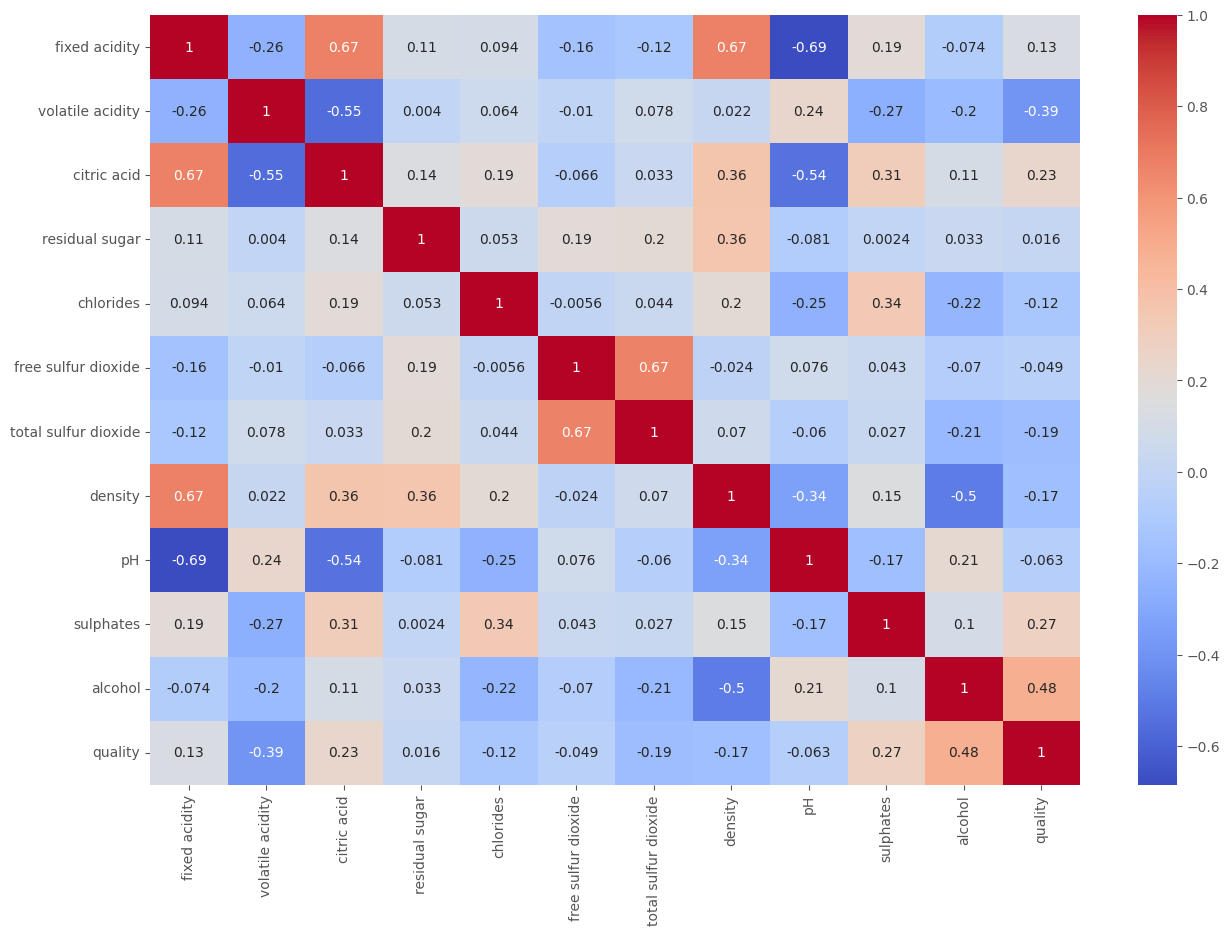

In [16]:
pear_corr = df_wine.corr(method="pearson")
# spear_corr = df_wine.corr(method="spearman")
# kendall_corr = df_wine.corr(method="kendall")

plt.style.use('ggplot')
plt.figure(figsize=(15, 10))
sns.heatmap(pear_corr, annot=True, cmap="coolwarm")
plt.show()

## **Correlation of categorical variable** - `Chi square test`

- Tests whether two categorical variables are related or independent.
> `Assumptions` - independent observation, size in each box of `contingency table > 25`


In [17]:
url_loan = "https://raw.githubusercontent.com/mohd-faizy/Stats-with-Data/main/_dataset/LoanApprovalPrediction.csv"

In [18]:
df_loan = pd.read_csv(url_loan)

print(df_loan.dtypes)
print("-"*30)
print(df_loan.nunique())
display(df_loan.head(5))

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object
------------------------------
Loan_ID              598
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      491
CoapplicantIncome    283
LoanAmount           199
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64


Loan_ID Gender Married  Dependents     Education Self_Employed  \
0  LP001002   Male      No         0.0      Graduate            No   
1  LP001003   Male     Yes         1.0      Graduate            No   
2  LP001005   Male     Yes         0.0      Graduate           Yes   
3  LP001006   Male     Yes         0.0  Not Graduate            No   
4  LP001008   Male      No         0.0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [19]:
df_loan.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
obj = (df_loan.dtypes == 'object')
print("Categorical variables:", len(list(obj[obj].index)))

Categorical variables: 7


In [21]:
df_loan = df_loan.drop(['Loan_ID'], axis=1)
df_loan

Gender Married  Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No         0.0      Graduate            No             5849   
1      Male     Yes         1.0      Graduate            No             4583   
2      Male     Yes         0.0      Graduate           Yes             3000   
3      Male     Yes         0.0  Not Graduate            No             2583   
4      Male      No         0.0      Graduate            No             6000   
..      ...     ...         ...           ...           ...              ...   
593  Female      No         0.0      Graduate            No             2900   
594    Male     Yes         3.0      Graduate            No             4106   
595    Male     Yes         1.0      Graduate            No             8072   
596    Male     Yes         2.0      Graduate            No             7583   
597  Female      No         0.0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0.0         NaN             360.0             1.0   
1               1508.0       128.0             360.0             1.0   
2                  0.0        66.0             360.0             1.0   
3               2358.0       120.0             360.0             1.0   
4                  0.0       141.0             360.0             1.0   
..                 ...         ...               ...             ...   
593                0.0        71.0             360.0             1.0   
594                0.0        40.0             180.0             1.0   
595              240.0       253.0             360.0             1.0   
596                0.0       187.0             360.0             1.0   
597                0.0       133.0             360.0             0.0   

    Property_Area Loan_Status  
0           Urban           Y  
1           Rural           N  
2           Urban           Y  
3           Urban           Y  
4           Urban           Y  
..            ...         ...  
593         Rural           Y  
594         Rural           Y  
595         Urban           Y  
596         Urban           Y  
597     Semiurban           N  

[598 rows x 12 columns]

In [22]:
!pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 66.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=da42c844d696edf43e9971493a0bbe9aa9731bc315bf6e

In [23]:
# Import the required libraries
import pandas as pd
import pandas_profiling as pp


profile = pp.ProfileReport(df_loan,
                           title="report_loan_Data",
                           html={'style': {"full-width": True}})
display(profile)

<ipython-input-23-8b28a9d216e8>:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<ipython-input-24-961ec5204ba0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pear_corr = df_loan.corr()


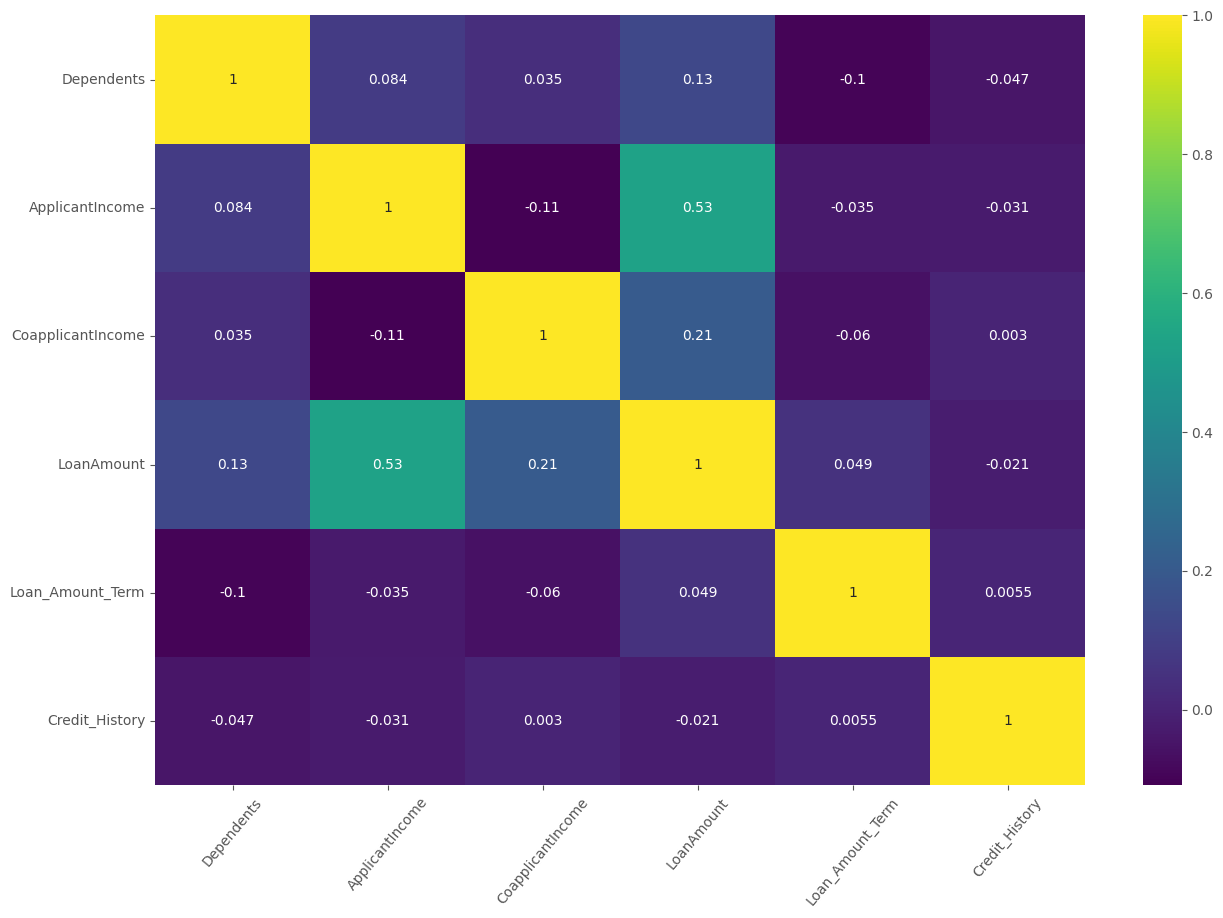

In [24]:
pear_corr = df_loan.corr()
# pear_corr = df_loan.corr(method='pearson')

plt.style.use('ggplot')
plt.figure(figsize=(15, 10))
sns.heatmap(pear_corr, annot=True, cmap="viridis")
plt.xticks(rotation = 50 )
plt.yticks(rotation = 360)
plt.show()

In [25]:
import scipy.stats as stats

# Contingency table
observed = [[25, 30, 35],
            [250,  300,  350]]

# Perform chi-squared test of independence
chi2_stat, p_val, dof, expected = stats.chi2_contingency(observed)

# Print results
print("Chi-squared statistic:", chi2_stat) # measure of the association
print("P-value:", p_val)                   # measure of the statistical significance 
print("Degrees of freedom:", dof)          # parameter used in the calculation of the p-value.
                                           # It represents the number of independent categories in the contingency table minus 1.
print("Expected frequencies:", expected)   # Frequencies, Expected under the assumption of independence between the variables in the contingency table.

Chi-squared statistic: 0.0
P-value: 1.0
Degrees of freedom: 2
Expected frequencies: [[ 25.  30.  35.]
 [250. 300. 350.]]


In [26]:
import scipy.stats as stats

# Calculate the chi-squared CDF
cdf = stats.chi2.cdf(3.0, df=2) # 3.0 is the value at which the cdf is evaluated
                                # df is the degree of freedom

# Calculate the chi-squared PDF
pdf = stats.chi2.pdf(3.0, df=2)

# Calculate the chi-squared ICDF
icdf = stats.chi2.ppf(0.95, df=2)

# Generate random numbers from a chi-squared distribution
random_numbers = stats.chi2.rvs(df=2, size=100)

# Print results
print("Chi-squared CDF:", cdf)
print("Chi-squared PDF:", pdf)
print("Chi-squared ICDF:", icdf)
print("Random numbers from chi-squared distribution:", random_numbers)

Chi-squared CDF: 0.7768698398515702
Chi-squared PDF: 0.11156508007421491
Chi-squared ICDF: 5.991464547107979
Random numbers from chi-squared distribution: [0.93853618 6.02024286 2.63349139 1.82588511 0.33924974 0.33919258
 0.11967754 4.02246173 1.83816431 2.46250012 0.04159862 7.00711495
 3.57285909 0.47737525 0.40135798 0.40522285 0.72550746 1.48785566
 1.13107413 0.68844599 1.89274175 0.30046906 0.69103102 0.91255444
 1.21786938 3.07587202 0.44547172 1.44405831 1.79500944 0.0951277
 1.87066604 0.3739225  0.13452786 5.94737559 6.74126068 3.30466315
 0.72657572 0.20555463 2.30550153 1.16018169 0.26030447 1.36709446
 0.06998744 4.80084577 0.59891555 2.1725116  0.74709316 1.46822179
 1.5824476  0.4087772  6.98561427 2.98449075 5.61018884 4.504304
 1.82210882 5.09887076 0.18531092 0.43626939 0.09256393 0.78706417
 0.98426058 0.63312089 3.52911573 0.882454   0.65960568 1.56481417
 0.3037963  3.24096719 0.15495174 8.66829268 2.95896755 0.44307888
 0.01107484 3.37979355 2.45419181 2.61132582

for the above code: 

`df=2` ~ `degrees of freedom`

In the context of the `chi-squared distribution`, the degrees of freedom refer to the number of `independent` observations used to calculate the `statistic`. 

>Specifically, for the `chi-squared` distribution, the `degrees of freedom(df or dof)` equals the number of categories or groups being compared minus `1`.

**For example**, if you are calculating a `chi-squared statistic` to test for the independence of `two categorical variables`, and each variable has `two` categories (i.e., a `2x2 contingency table`), then the degrees of freedom would be `(2-1) x (2-1) = 1`.

>In general, as the number of categories or groups being compared increases, the degrees of freedom for the chi-squared distribution also increase.

#### Pandas `crosstab`

`pd.crosstab()` is a function in the pandas library of Python that is used to create a `contingency table` or `cross-tabulation table`.

> A contingency table is a table that displays the `frequency distribution` of `two` or `more` `categorical variables`.

In [27]:
import pandas as pd

# create a DataFrame
df = pd.DataFrame({
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'Age': [25, 30, 35, 40, 45],
    'Smoker': ['Yes', 'No', 'Yes', 'No', 'No']
})

# create a contingency table of the counts of smokers by gender
ct = pd.crosstab(df['Smoker'], df['Gender'])

print(ct)

Gender  Female  Male
Smoker              
No           2     1
Yes          0     2


### **what is `scipy.stats.chi2` and how its different from  `scipy.stats.chi2_contingency`?**

---

- `scipy.stats.chi2`:

    - `scipy.stats.chi2` is a function in `SciPy` used for various calculations related to the chi-squared distribution.

    - The `chi-squared` distribution is a continuous probability distribution that is commonly used in statistical hypothesis tests, such as the chi-squared test of independence.

    - The function can be used to calculate the `cumulative distribution function (CDF)`, `probability density function (PDF)`, `inverse cumulative distribution function (ICDF)`, and generate random numbers from a chi-squared distribution.

    - It takes the degrees of freedom as an input parameter, which determines the shape and scale of the chi-squared distribution.

    - The `CDF` gives the probability that a chi-squared random variable is less than or equal to a given value.

    - The `PDF` gives the probability density at a given value of a chi-squared random variable.

    - The `ICDF` gives the value below which a specified percentage of the chi-squared distribution falls.

    - The function can also generate random numbers from a chi-squared distribution with a specified degrees of freedom.

---

- `scipy.stats.chi2_contingency`:

    - `scipy.stats.chi2_contingency`, on the other hand, is specifically used for performing `chi-squared tests` of independence on contingency tables.

    - It takes a contingency table as input and calculates the `chi-squared statistic`, `p-value`, `degrees of freedom`, and `expected frequencies` for the contingency table.

    - It is used to assess the `association` between `two categorical variables` in a `contingency table`, and to determine if there is a statistically significant association between them.

    - It does `not` calculate the `CDF`, `PDF`, `ICDF`, or generate random numbers from the chi-squared distribution, unlike `scipy.stats.chi2`.

    - It is commonly used in `hypothesis testing` and `statistical analysis` involving contingency tables, while `scipy.stats.chi2` is used for general calculations related to the chi-squared distribution.

**Genrating the contingency table for `df_loan`**

In [28]:
# `Assumptions` - independent observation, size in each box of `contingency table > 25`
contingency_data = pd.crosstab(df_loan['Gender'], df_loan['Credit_History'], margins = False)
contingency_data

Credit_History  0.0  1.0
Gender                  
Female           17   83
Male             69  380

**Performing the `chi2_contingency` test on contingency table form `df_loan`**

In [29]:
import scipy.stats as stats

chi2_stats, p_val, dof, expected = stats.chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' % (chi2_stats, p_val))

alpha = 0.05

if p > alpha:
    print('Independent categories')
else:
    print('Dependent categories')

stat=0.065, p=0.799
Independent categories


In [30]:
import scipy.stats as stats

contingency_data = [[25,125],[1200,240]] # Observe the numbers carefully

chi2_stats, p_val, dof, expected = stats.chi2_contingency(contingency_data)
print("chi2_stats=%.3f, p_value=%.3f" %(chi2_stats, p_val))

alpha = 0.05

if p_val > alpha:
    print('Independent categories')
else:
    print('Dependent categories')

chi2_stats=337.622, p_value=0.000
Dependent categories
